In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
### Carregando as bases de dados
db_credit = pd.read_csv('credit_data.csv')
db_census = pd.read_csv('census.csv')

### Detecção de Outlier com Boxplot

In [3]:
db_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [4]:
db_credit.dropna(inplace=True)
db_credit.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

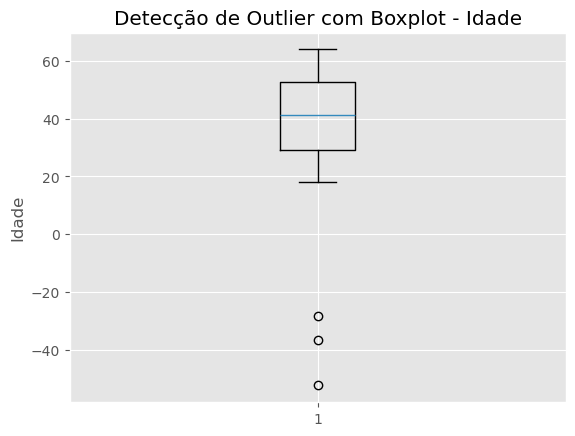

In [5]:
plt.title("Detecção de Outlier com Boxplot - Idade")
plt.ylabel("Idade")
plt.boxplot(x=db_credit['age']);

In [6]:
age_mask = db_credit['age'] < -20
outliers_age = db_credit[age_mask]
outliers_age


,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


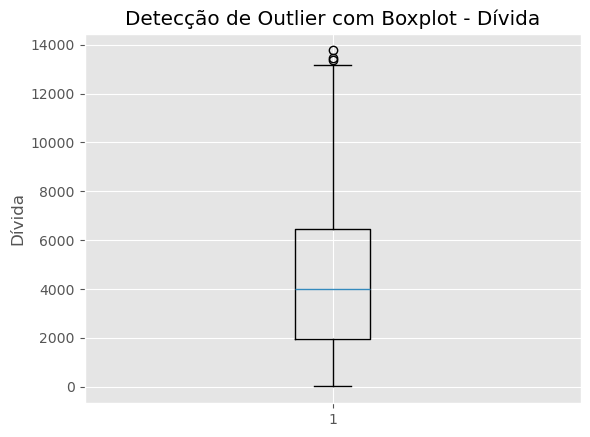

In [7]:
plt.title("Detecção de Outlier com Boxplot - Dívida")
plt.ylabel("Dívida")
plt.boxplot(x=db_credit['loan']);

In [8]:
loan_mask = db_credit['loan'] > 13_300
outliers_loan = db_credit[loan_mask]
outliers_loan

,clientid,income,age,loan,default
1378,1379,69755.320163,44.543682,13766.051239,0
1584,1585,67289.585683,26.727400,13376.797706,1
1801,1802,67802.694456,49.037987,13443.473176,0


### Detecção de Outlier com Gráfico de Dispersão

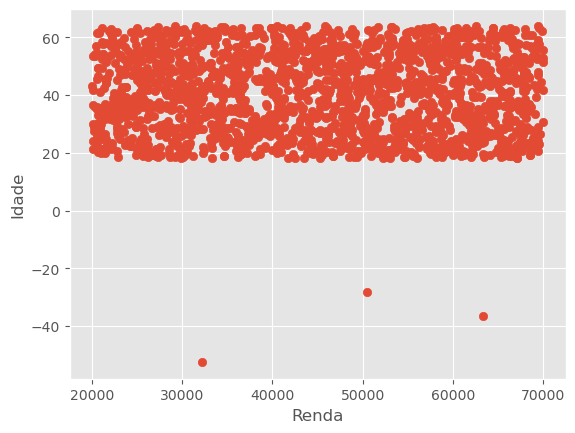

In [10]:
### Income x Age
plt.scatter(x=db_credit['income'], y=db_credit['age'])
plt.ylabel('Idade')
plt.xlabel('Renda')
plt.show()

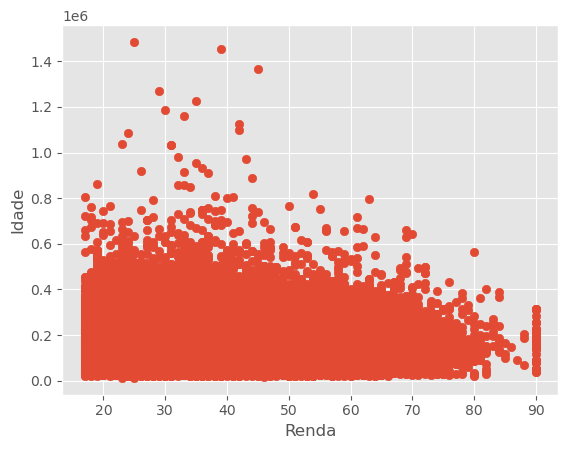

In [12]:
### Income x Age
plt.scatter(x=db_census['age'], y=db_census['final-weight'])
plt.ylabel('Idade')
plt.xlabel('Renda')
plt.show()

### Detecção de Outlier com a biblioteca PyOD

In [14]:
db_credit.columns

Index(['clientid', 'income', 'age', 'loan', 'default'], dtype='object')

In [26]:
from pyod.models.knn import KNN

detector: KNN = KNN()
detector.fit(db_credit.iloc[: , 1:4])


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [32]:
np.unique(detector.labels_, return_counts=True)
# 200 registros são outliers

(array([0, 1]), array([1797,  200], dtype=int64))

In [30]:
detector.decision_scores_

array([ 704.78948078,  365.218309  ,  583.2159934 , ...,  395.01466508,
        557.88978241, 1071.5109404 ])

O último registro tem o último valor muito maior se comparado aos outros

#### Criar um dataframe de outliers

In [42]:
outlier_mask = detector.labels_ == 1 
df_outlier = db_credit.iloc[outlier_mask]

In [43]:
df_outlier

,clientid,income,age,loan,default
4,5,66952.688845,18.584336,8770.099235,1
24,25,65301.984029,48.840922,5465.267886,0
29,30,58842.891308,54.510948,10871.186790,0
34,35,57584.973790,36.672021,1728.423755,0
38,39,60921.063104,18.840526,968.836383,0
...,...,...,...,...,...
1943,1944,59792.508585,24.187499,660.241453,0
1944,1945,35879.519994,41.072935,5335.403499,0
1957,1958,50458.958203,52.314565,9852.889427,0
1996,1997,69516.127573,23.162104,3503.176156,0


## Referências

[How to Identify Outliers](https://machinelearningmastery.com/how-to-identify-outliers-in-your-data/)  
[How to Make Your Machine Learning Models Robust to Outliers](https://www.kdnuggets.com/2018/08/make-machine-learning-models-robust-outliers.html)